In [1]:
"""
Maxis Notebook for testing

"""

'\nMaxis Notebook for testing\n\n'

In [2]:
# Must have imports
import helper
from analyzer import Analyzer
from crawler import Crawler
from plotter import Plotter
from model import TextBlob, TrainedSentimentModel
import tensorflow

In [5]:
# Extra imports
import datetime
import numpy as np
import tweepy

In [4]:
# Sample Config
config = {
	"user_auth": False, # autheticate as user or application
    "search": {
        "location": "darmstadt",	# based on helper.GEOCODES dictionary
        "radius": 100, # optional default to 100
        "query": ['corona'], # query for searching (str array), either query or location has to be not empty
        "max_searches": 22000, # Default: 1000 max amount of searches 
        "num_results": 22000, # number of results with defined filter options
        "rate_limit": True,  # Default True: to turn off rate limit prints
        "filter": { # Filter applies to search
            "not_reply": True, # Filters for not replies when true, does nothing when false
            "not_retweet": True, # Filters for not retweets when true, does nothing when false
            "until": datetime.datetime(2020, 1, 1), # None or datetime (e.g. datetime.datetime(2020, 5, 20))
        }
    },
	"get_user": { # Optional, only when querying for users
		"good_user": False, # mandatory
		"search_type": "recent_user", # 'recent_user', 'recent_retweeted_user'
		"num_users": 5, # mandatory
	},
	"plot": {
		"title": "Testing",
	}
    # Full search not tested and should only be used with caution!
    "full_search": {
        "query": "#Corona lang:de" # the query used for full search
        "env_name": "dev", # your premium environment name
        "fromDate": "2020" + "01" + "15" + "1200", # Format: YYYYMMDDHHmm
        "toDate": "2020" + "06" + "01" + "1200"
    }
}


In [6]:
# Load configs and init models
config = helper.init_config(config)

modl = TextBlob()
modlUs = TrainedSentimentModel()

craw = Crawler(config)
anal = Analyzer(config, modlUs)
plot = Plotter(config)

In [17]:
# Analyze user:
# users = craw.get_users()
# print(len(users))
# user = craw.get_user_from_id("ZDFheute")
user = craw.get_user_from_id("BarackObama")
# tweets = craw.get_tweets()
# tweets = craw.get_timeline(users[0])
# len(tweets)

In [18]:
tweets = craw.get_timeline(user)
print(user.screen_name)
print(len(tweets))

Search reached end point
Checked Tweets: 142
remaining requests: 1323
tweets remaining: ~ 19845
reset at: 2020-06-24 13:33:20
reset in: 04:23
BarackObama
96


In [20]:
print(user.screen_name)
print(user.name)
print(tweets[95].created_at)

BarackObama
Barack Obama
2020-01-01 17:16:44


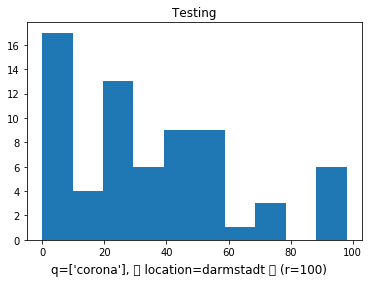

In [42]:
# res = anal.analyze_timeline(tweets)
plot.simple_hist(res["ages"]["tweets_age"])

In [7]:
filename = "saved_data/recent_timeline_tweets_1000.json"
tweets = craw.load_tweet(filename)
# craw.save_tweets(tweets, filename)
print(tweets[0].text)
print(tweets[1].text)
print(tweets[2].text)
print(tweets[3].text)

Nach dreimonatiger #Corona-Pause dürfen deutsche "Test-Touristen" erstmals wieder nach #Mallorca reisen. Von Mitarb… https://t.co/BbfbSTD5t6
In der Übergangsphase des #brexit wollen die EU und Großbritannien ein Handelspaket erarbeiten. Bei dem Gespräch zw… https://t.co/ekiRhMlb69
In Brandenburg wird die AfD vom Verfassungsschutz beobachtet. Der Sommerurlaub in 27 Ländern ist jetzt möglich. Das… https://t.co/mePCBJO2AY
Im weltweiten Rennen um einen #Impfstoff gegen das #Coronavirus steigt der Bund mit 300 Millioenen Euro beim deutsc… https://t.co/rKMYFYWIJy


In [ ]:
filename = "saved_data/zdfheute_22000.json"
tweets = craw.load_tweet(filename)

In [10]:
res = anal.analyze_sentiment(tweets)
res2 = anal.analyze_timeline(tweets)
# plot.simple_hist(res["ages"])

In [12]:
len(res2["ages"]["tweets_age"])

801

In [23]:
dataBlob = []
fullSenti = []
for tweet in tweets:
    senti = modl.get_polarity_without_preprocessing(tweet.text)
    fullSenti.append(senti)
    # TODO kann man auch auslagern
    # Beste Text Blob sentis: -0.7, 0.7
    if senti > 0.7:
        dataBlob.append('pos')
    elif senti < -0.7:
        dataBlob.append('neg')
    else:
        dataBlob.append('neut')

In [21]:
dataUs = modlUs.get_sentiment_labels_batch([tweet.text for tweet in tweets])
dataUs2 = modlUs.get_sentiment_label_without_preprocessing([tweet.text for tweet in tweets])

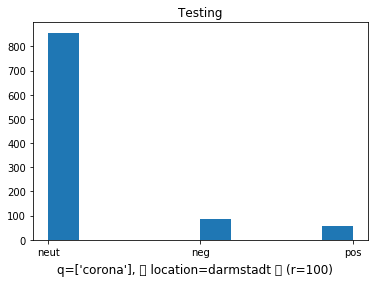

In [22]:
plot.simple_hist(dataUs)

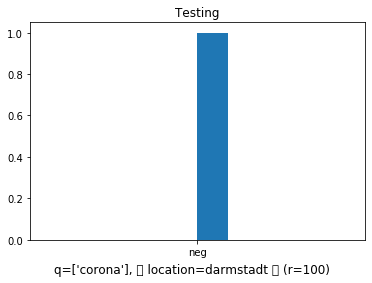

In [25]:
plot.simple_hist(dataUs2)